# According to the latest meeting, here is the new analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('default')
plt.rcParams.update({'font.size': 16})
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [14]:
data = pd.read_csv("DATA111_2DAILY_V1.csv")
data['YEAR'] = data['YEAR'].astype(int)

<a id=0></a>

# Exploratory Data Analysis V2

*In this notebook im going to analyze some hypothesis:*

- [1.  Days with bigger pression are also colder (Max air pression x Min air temperature)](#1)
- [2.  Also, days with larger pression are driest (Max air pression x Mn air moisture)](#2)

In [15]:
data.head()

,YEAR,DAY365,MAX_N_WNDVEL_5M,DIR_MAX_N_WNDVEL_5M,MIN_N_WNDVEL_5M,DIR_MIN_N_WNDVEL_5M,MEAN_N_WNDVEL_5M,MAX_N_WNDVEL_2M,DIR_MAX_N_WNDVEL_2M,MIN_N_WNDVEL_2M,...,DIR_MIN_N_PRESSION_HPA,MEAN_N_PRESSION_HPA,MAX_N_RAIN_SUM10,DIR_MAX_N_RAIN_SUM10,MIN_N_RAIN_SUM10,DIR_MIN_N_RAIN_SUM10,MEAN_N_RAIN_SUM10,HUMIDEX,MONTH,WEEK
0,1997,1.0,5561.0,9.33,0.892,31.87,2302.065328,3075.0,134.40,0.763,...,181.40,942.831933,0.0,8.32,0.0,8.32,0.0,38.572855,1,0.0
1,1997,2.0,4266.0,154.70,0.363,63.72,1949.374418,2876.0,152.00,0.626,...,125.60,943.809091,0.0,131.60,0.0,131.60,0.0,32.739444,1,0.0
2,1997,3.0,4835.0,162.40,2.050,131.10,2560.208496,2907.0,94.80,0.717,...,125.40,945.424779,0.0,148.20,0.0,148.20,0.0,31.917413,1,0.0
3,1997,4.0,3246.0,157.30,0.461,40.96,1256.941059,1942.0,7.12,0.000,...,24.88,943.075630,0.0,157.30,0.0,157.30,0.0,37.472388,1,0.0
4,1997,5.0,4188.0,147.10,0.000,157.70,1198.817863,2646.0,9.39,0.000,...,60.63,942.717742,0.0,19.87,0.0,19.87,0.0,40.046635,1,0.0


In [16]:
data.columns.values

array(['YEAR', 'DAY365', 'MAX_N_WNDVEL_5M', 'DIR_MAX_N_WNDVEL_5M',
       'MIN_N_WNDVEL_5M', 'DIR_MIN_N_WNDVEL_5M', 'MEAN_N_WNDVEL_5M',
       'MAX_N_WNDVEL_2M', 'DIR_MAX_N_WNDVEL_2M', 'MIN_N_WNDVEL_2M',
       'DIR_MIN_N_WNDVEL_2M', 'MEAN_N_WNDVEL_2M', 'MAX_N_WNDDIR_DEGREE',
       'DIR_MAX_N_WNDDIR_DEGREE', 'MIN_N_WNDDIR_DEGREE',
       'DIR_MIN_N_WNDDIR_DEGREE', 'MEAN_N_WNDDIR_DEGREE',
       'MAX_N_INCRAD_10MSR', 'DIR_MAX_N_INCRAD_10MSR',
       'MIN_N_INCRAD_10MSR', 'DIR_MIN_N_INCRAD_10MSR',
       'MEAN_N_INCRAD_10MSR', 'MAX_N_REFRAD_10MSR',
       'DIR_MAX_N_REFRAD_10MSR', 'MIN_N_REFRAD_10MSR',
       'DIR_MIN_N_REFRAD_10MSR', 'MEAN_N_REFRAD_10MSR',
       'MAX_N_PHTFLOW_10MSR', 'DIR_MAX_N_PHTFLOW_10MSR',
       'MIN_N_PHTFLOW_10MSR', 'DIR_MIN_N_PHTFLOW_10MSR',
       'MEAN_N_PHTFLOW_10MSR', 'MAX_N_NHTFLOW_10MSR',
       'DIR_MAX_N_NHTFLOW_10MSR', 'MIN_N_NHTFLOW_10MSR',
       'DIR_MIN_N_NHTFLOW_10MSR', 'MEAN_N_NHTFLOW_10MSR',
       'MAX_N_AIRMTR_PCT10', 'DIR_MAX_N_AIRMTR_PCT10

<a id=1></a>

# 1. Days with bigger pression are also colder (Max air pression x Min air temperature)

1997


c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


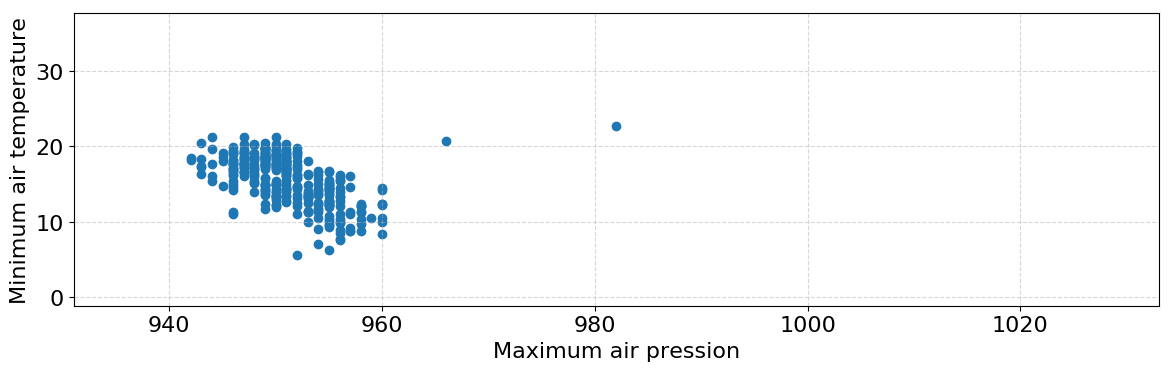

1998


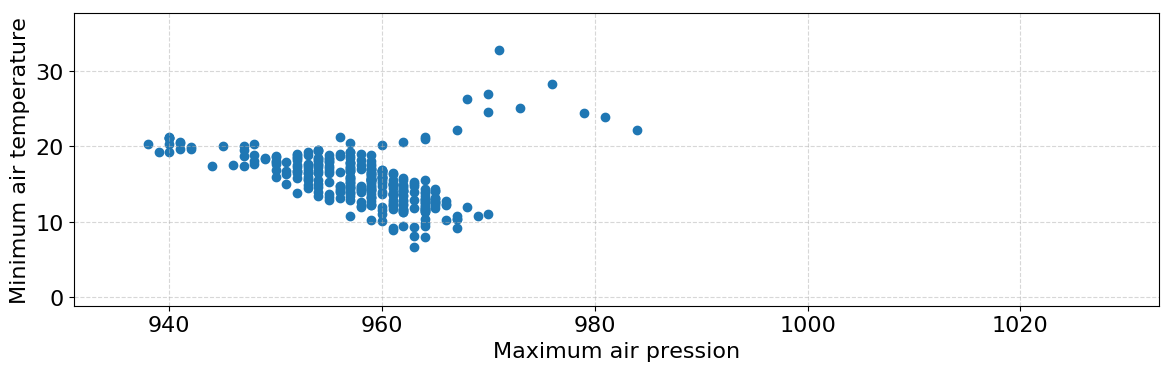

1999
fig/PRESSAO_MINTEMP_1999


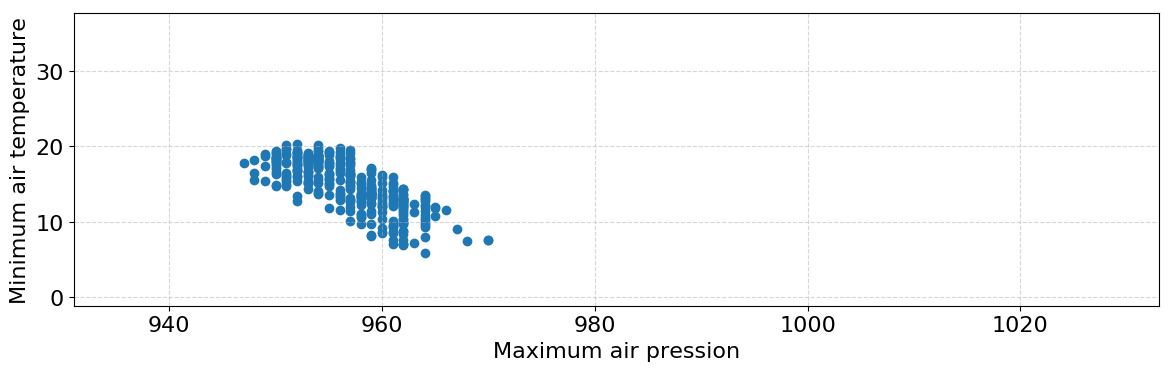

2000


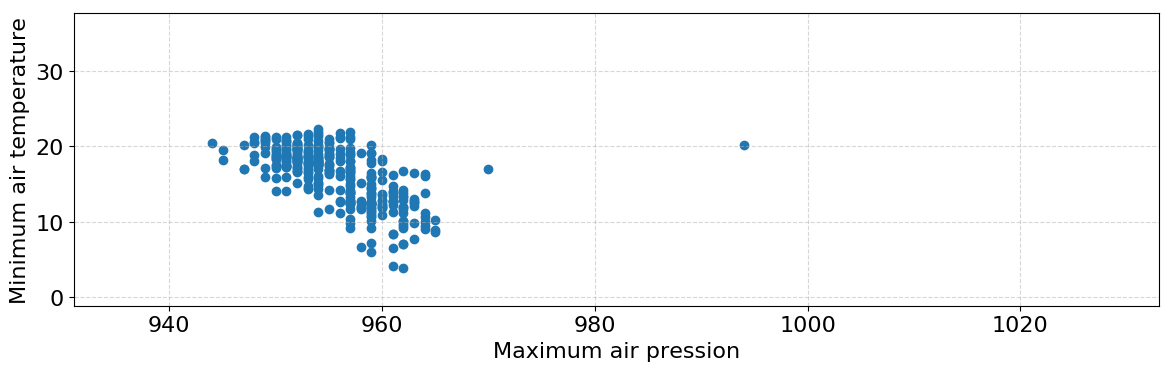

2001


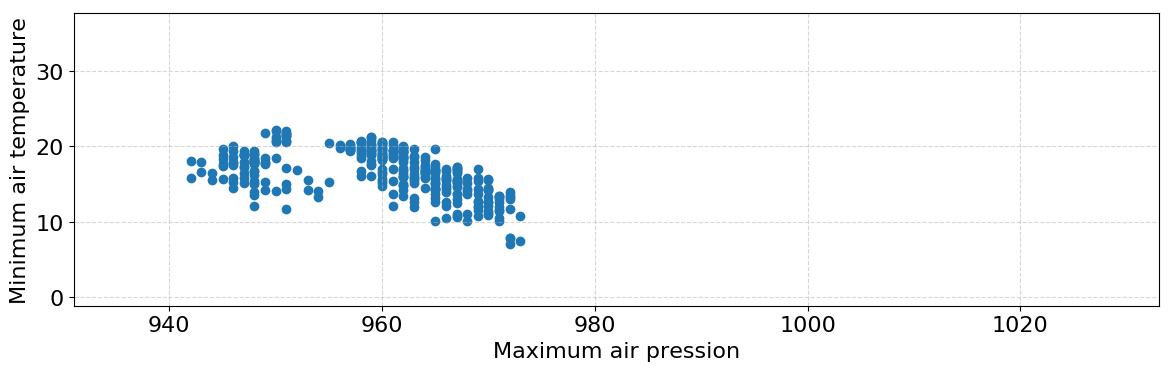

2002
fig/PRESSAO_MINTEMP_2002


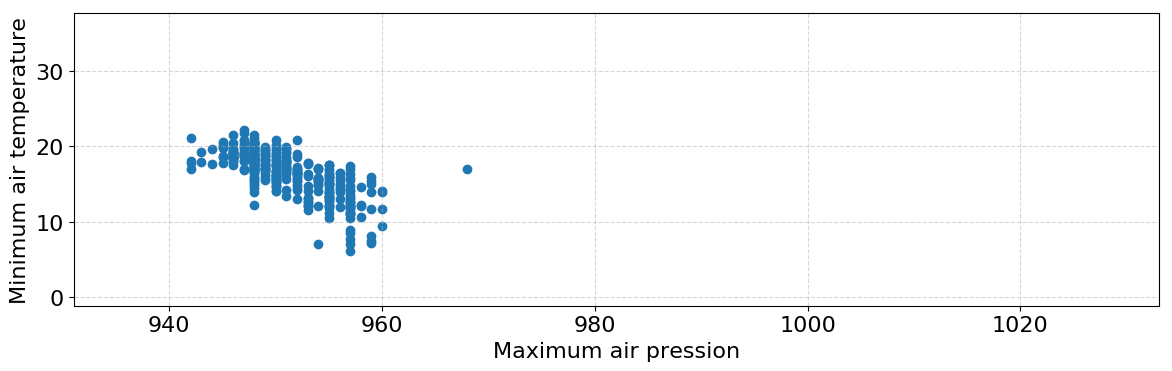

2003


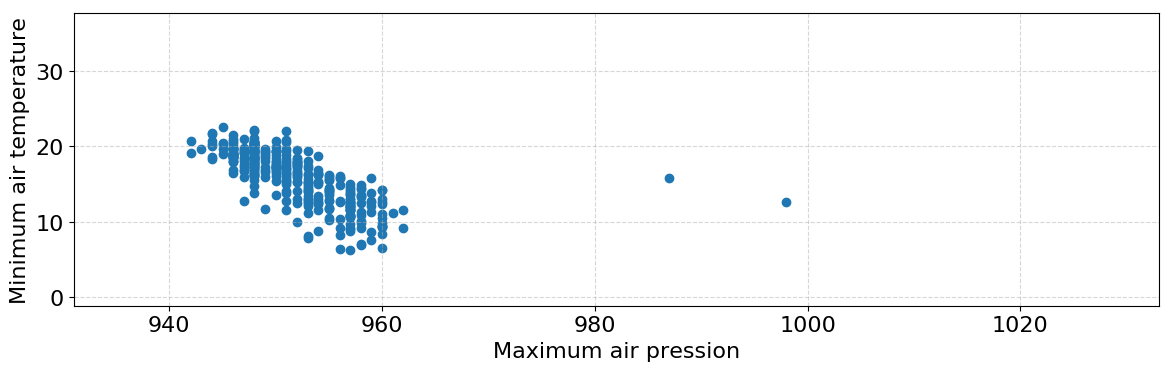

2004


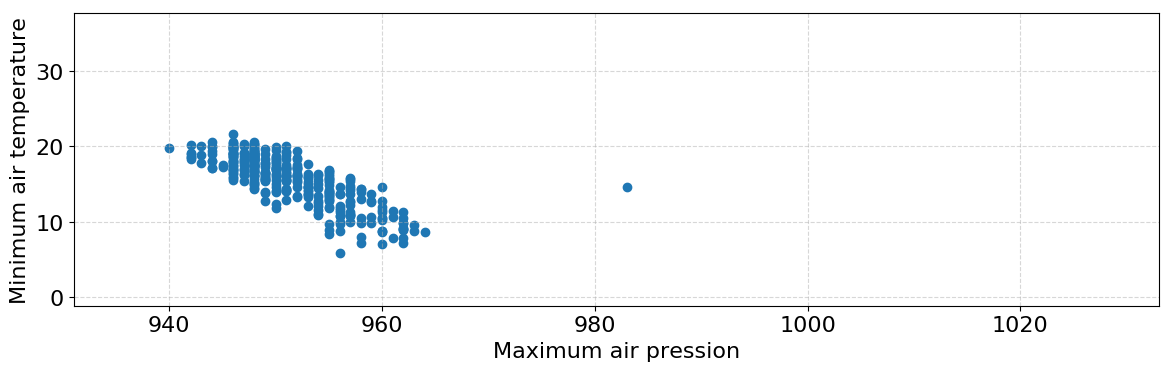

2005
fig/PRESSAO_MINTEMP_2005


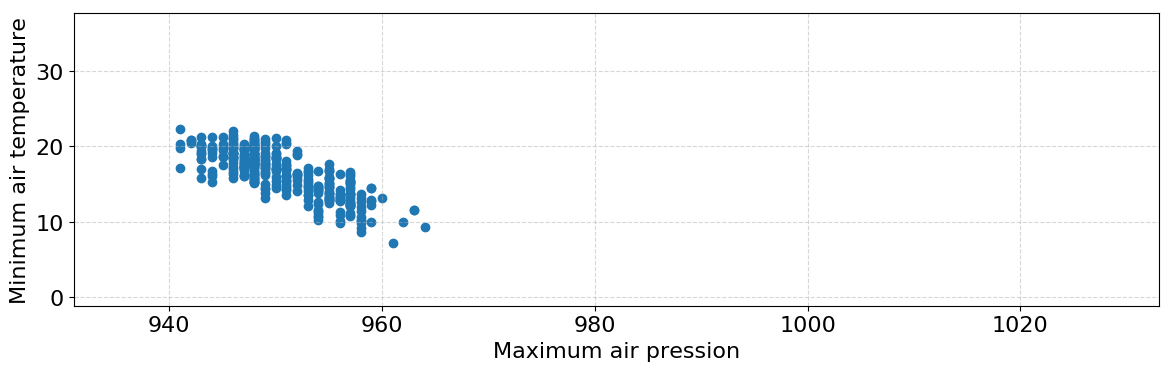

2006


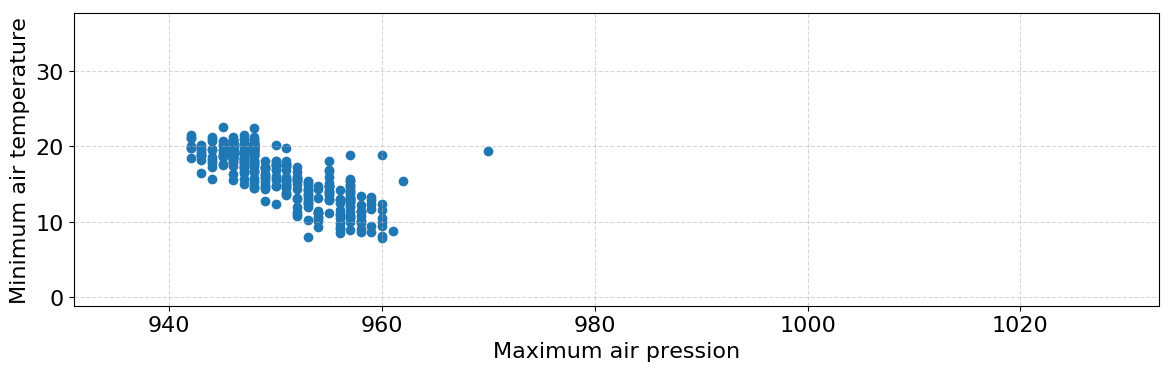

2007
fig/PRESSAO_MINTEMP_2007


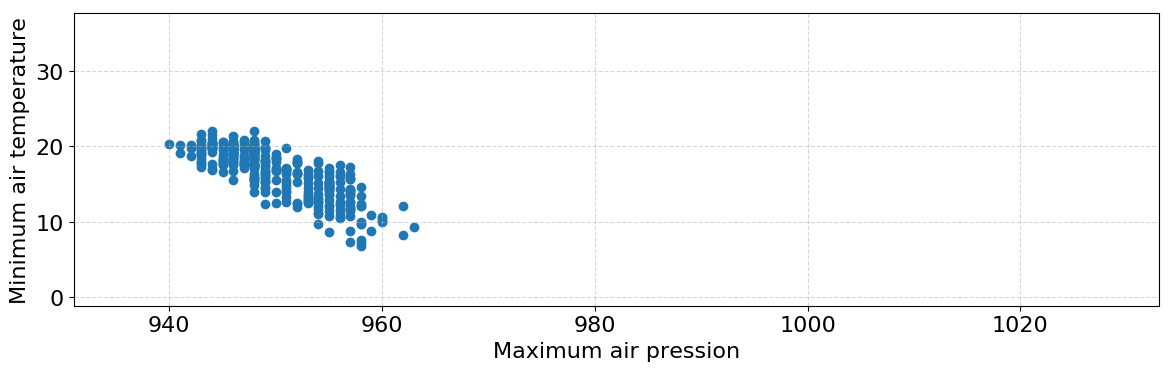

2008


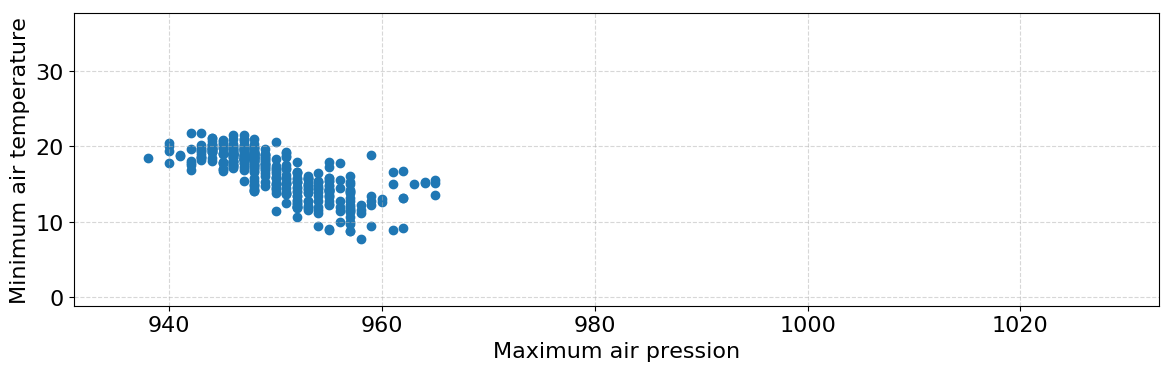

2009


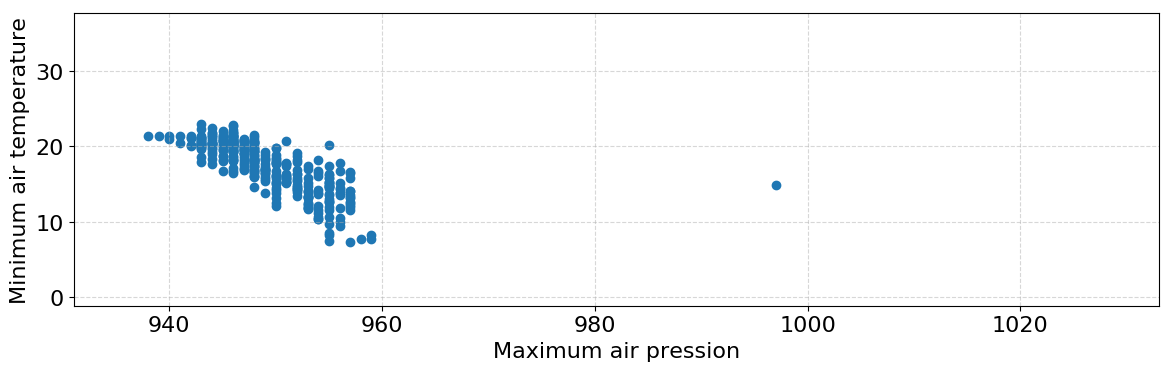

2010


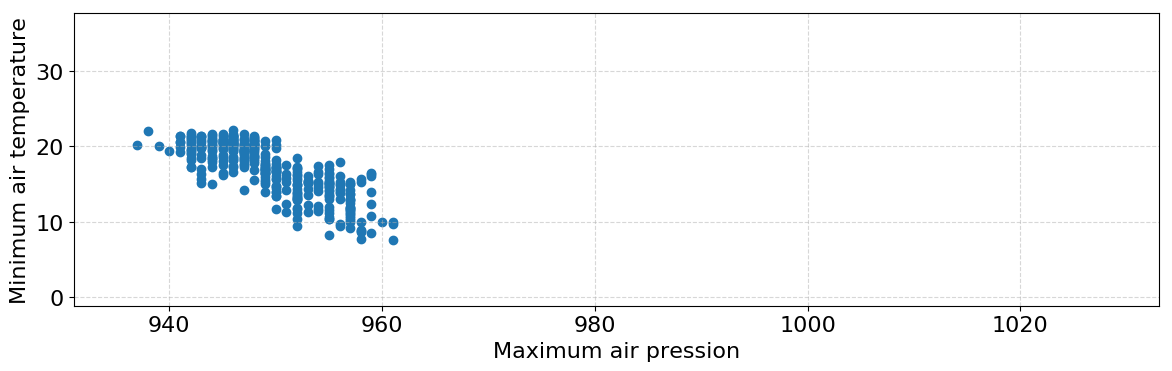

2011
fig/PRESSAO_MINTEMP_2011


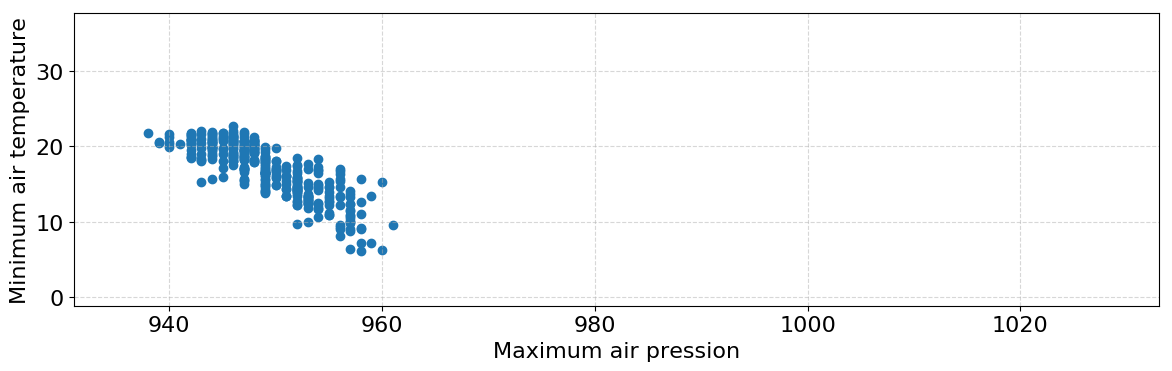

2012


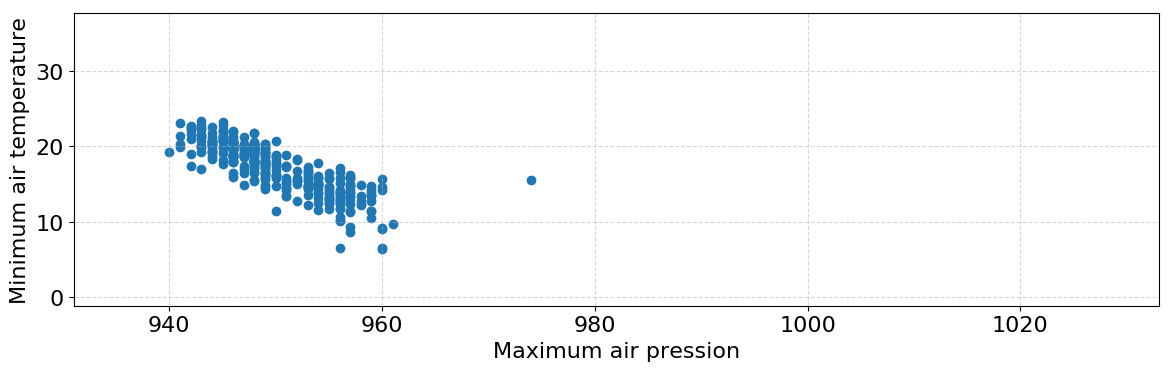

2013


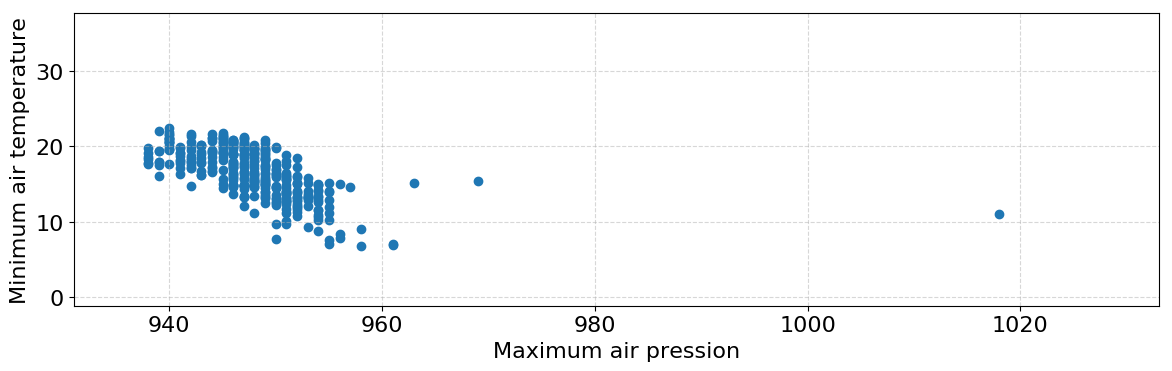

2014


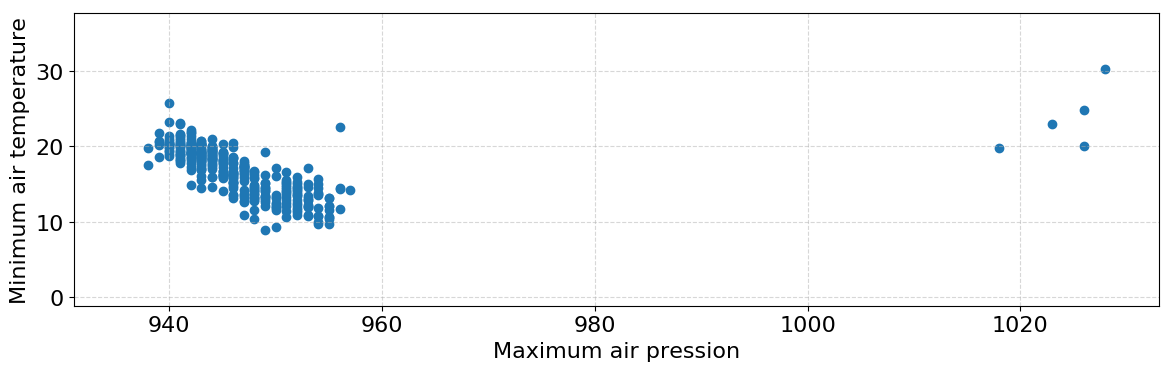

2015


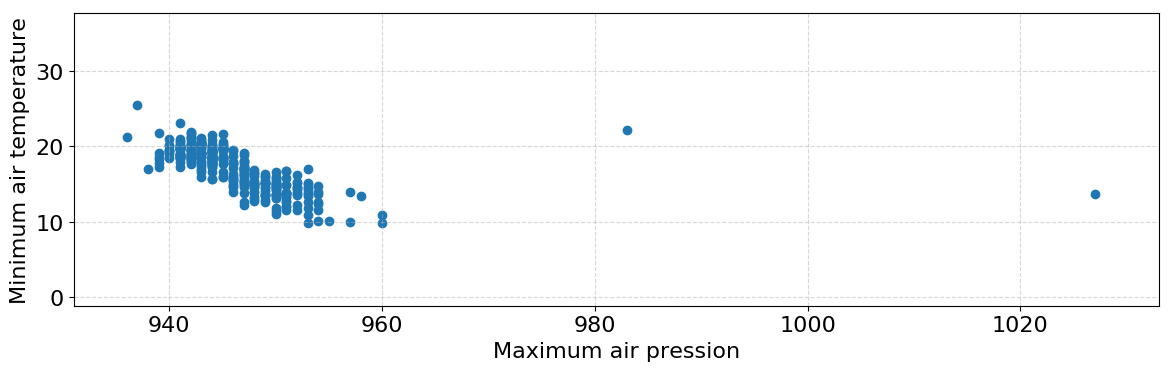

2016
fig/PRESSAO_MINTEMP_2016


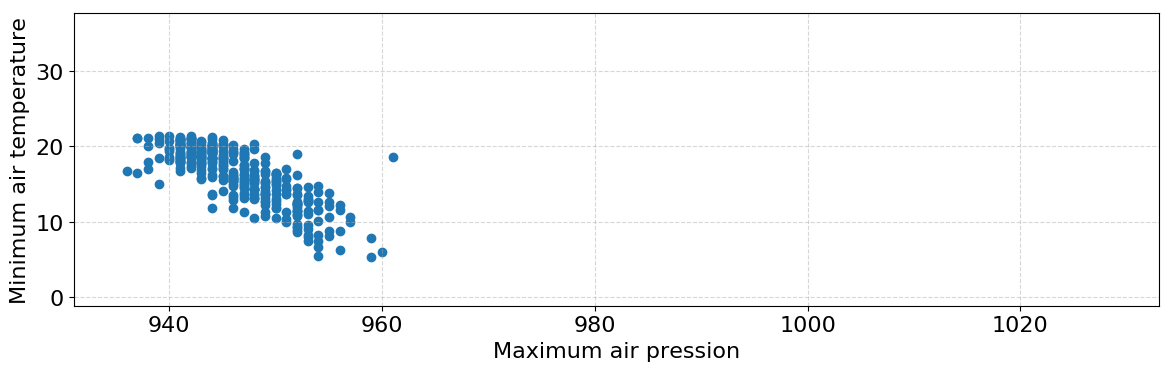

2017
fig/PRESSAO_MINTEMP_2017


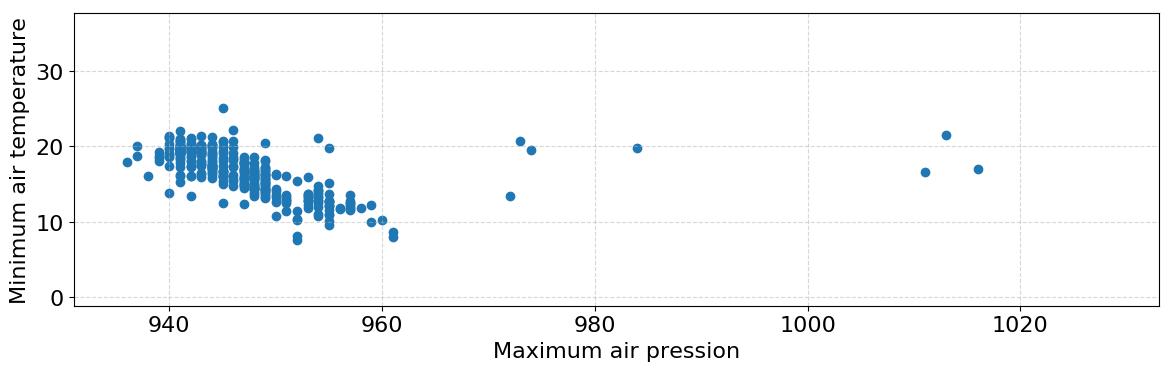

2018
fig/PRESSAO_MINTEMP_2018


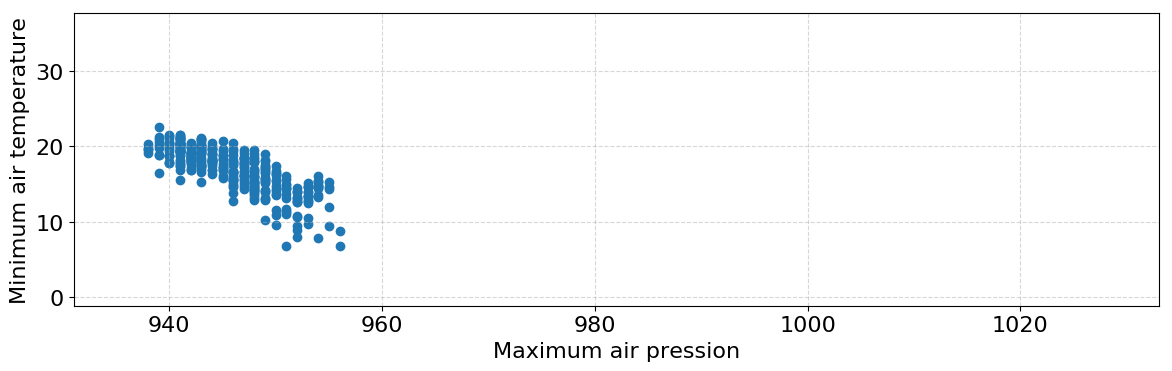

In [17]:
var1 = 'MAX_N_PRESSION_HPA'
var2 = 'MIN_N_AIRTMP_MED10'

min_x_value = data[var1].min() - 5
max_x_value = data[var1].max() + 5

min_y_value = data[var2].min() - 5
max_y_value = data[var2].max() + 5

for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    print(i)
    
    plt.figure(figsize=(12,4))
#     plt.title(str(i))    
    plt.scatter(data_2plot[var1], data_2plot[var2])
    plt.xlabel('Maximum air pression')
    plt.ylabel('Minimum air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    
    
    if((i == 2018)|(i == 2017)|(i==1999)|(i==2002)|(i==2005)|(i==2007)|(i==2011)|(i==2016)):
        str_name = 'fig/PRESSAO_MINTEMP_' + str(int(i))
        print(str_name)
        plt.savefig(str_name)
    plt.show()

In [18]:
data[[var1, var2]].corr()

,MAX_N_PRESSION_HPA,MIN_N_AIRTMP_MED10
MAX_N_PRESSION_HPA,1.00000,-0.54877
MIN_N_AIRTMP_MED10,-0.54877,1.00000


A lot of values seems to be an outlier which make the plots be so sparse, although it seem to have a good correlation between Min air temperature and Max air pression

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


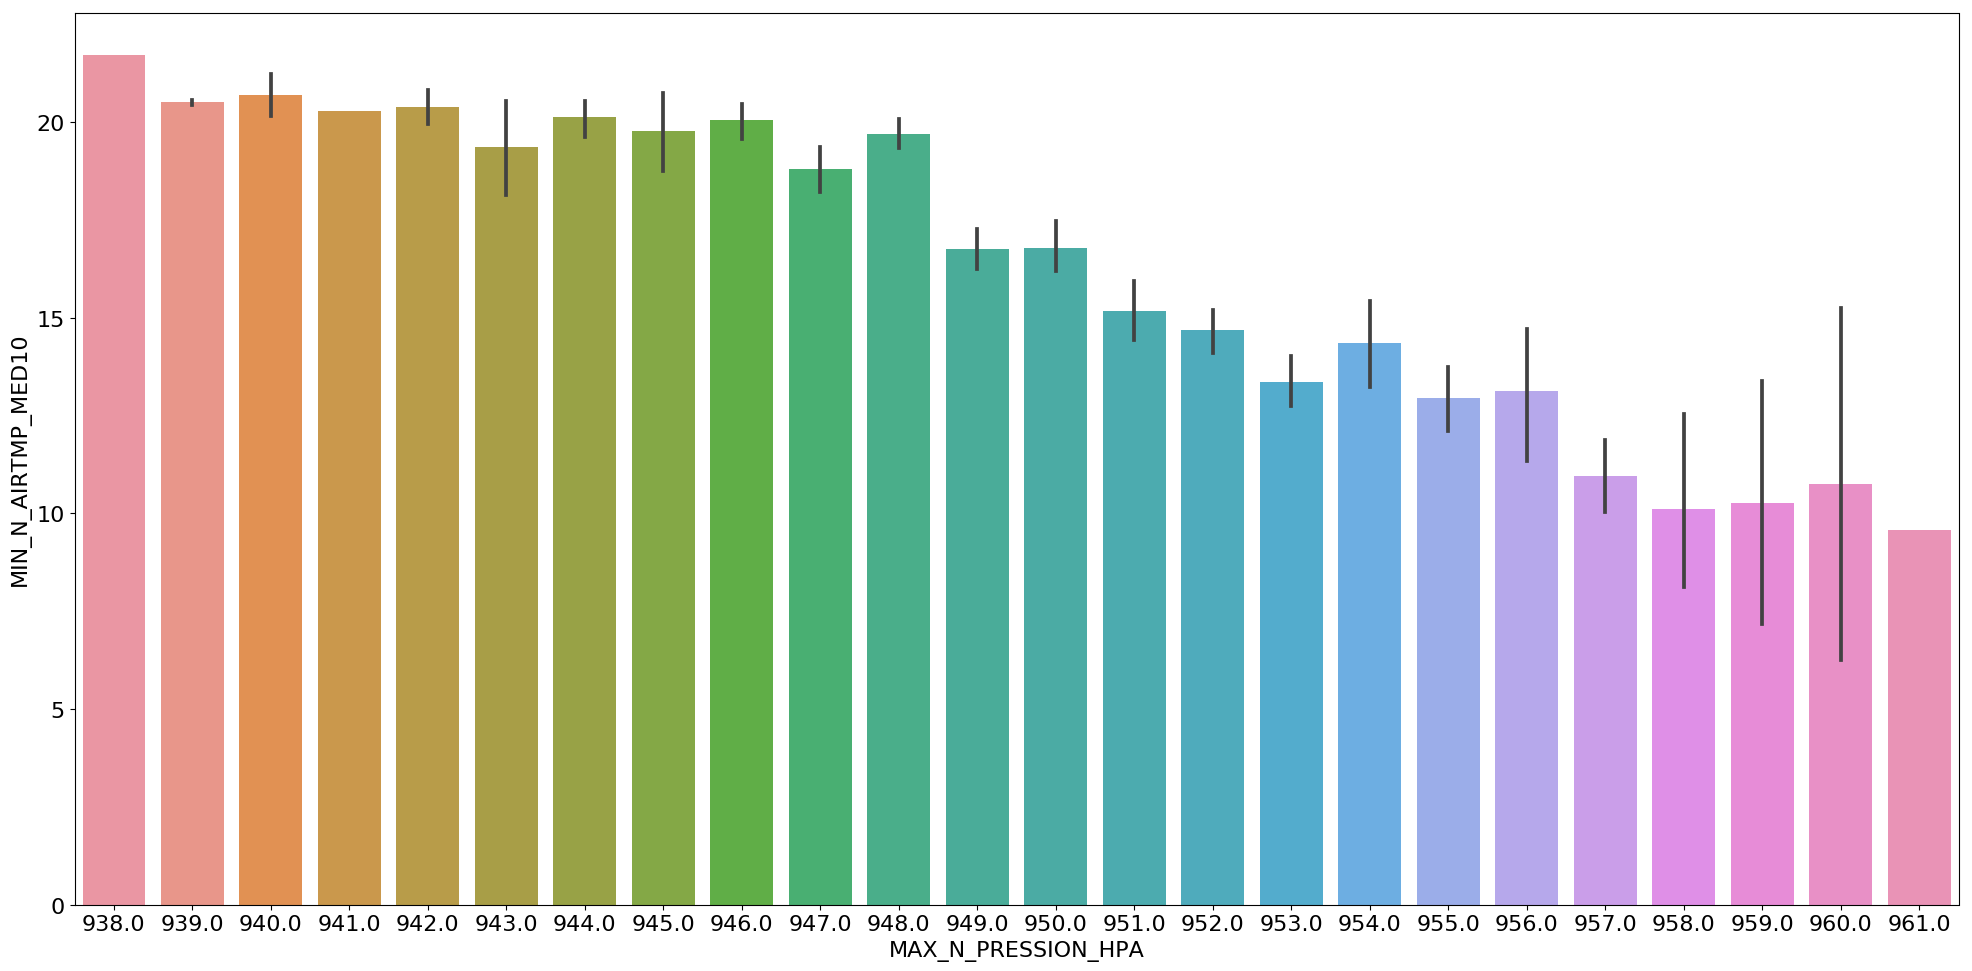

In [19]:
data_plot = data[data.YEAR == 2011]

plt.figure(figsize=(20,10))
sns.barplot(x= var1, y = var2, data = data_plot)

In [20]:
data_plot[var1].nunique()

24

When looked in year that doen't have outliers it is very clear the relationship

[Main menu](#0)

<a id=2></a>

# 2. Also, days with larger pression are driest (Max air pression x Min air moisture)

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


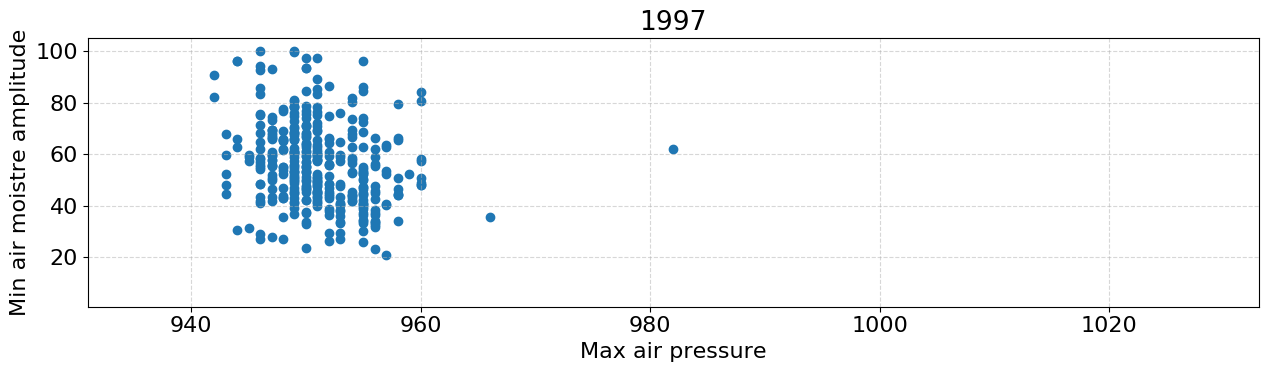

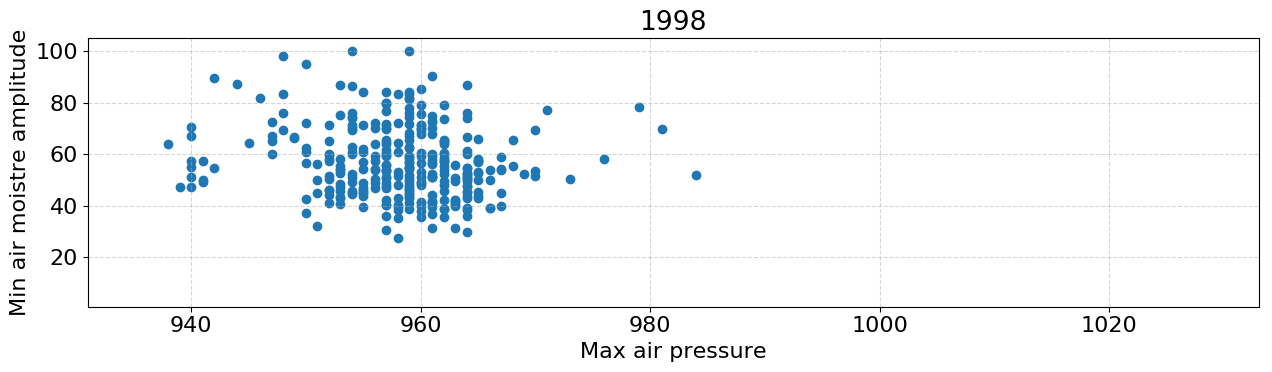

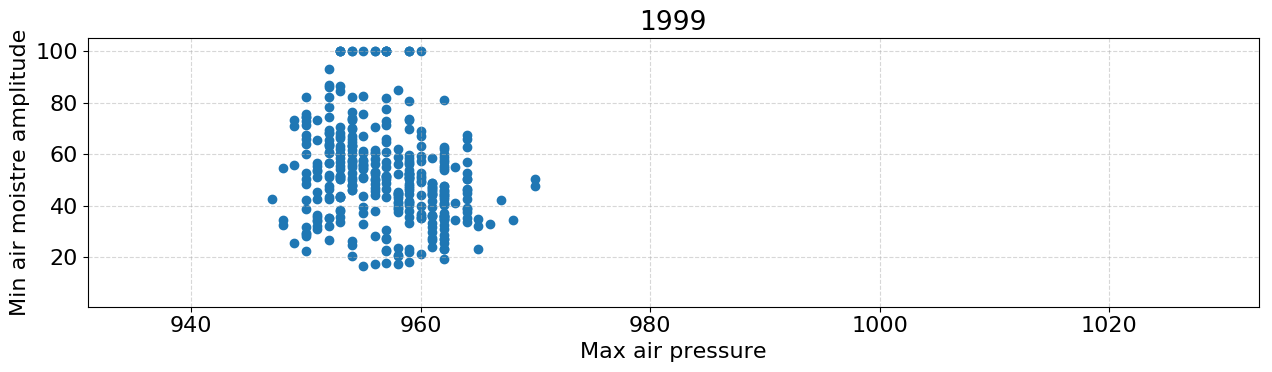

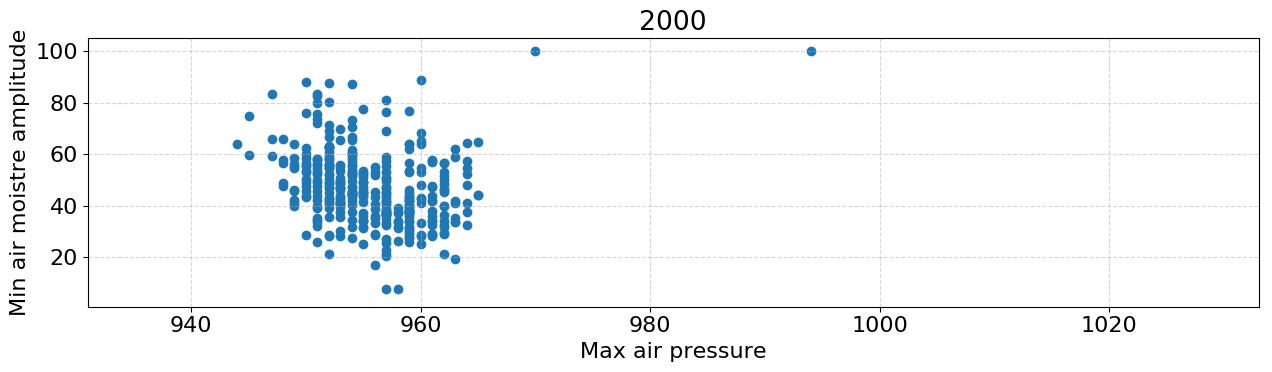

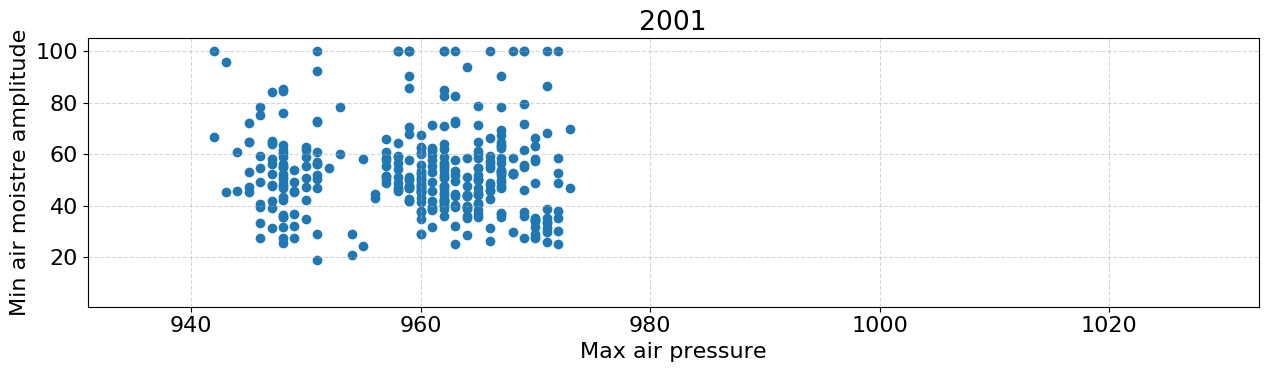

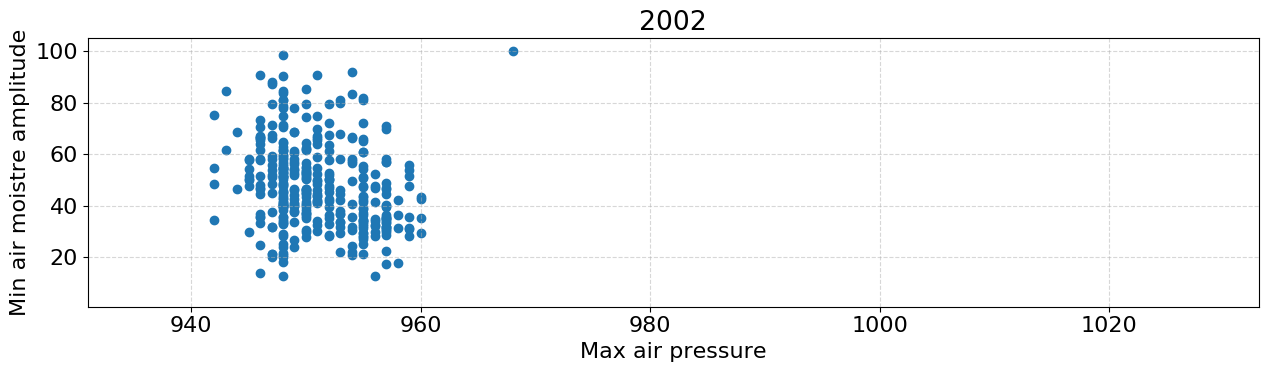

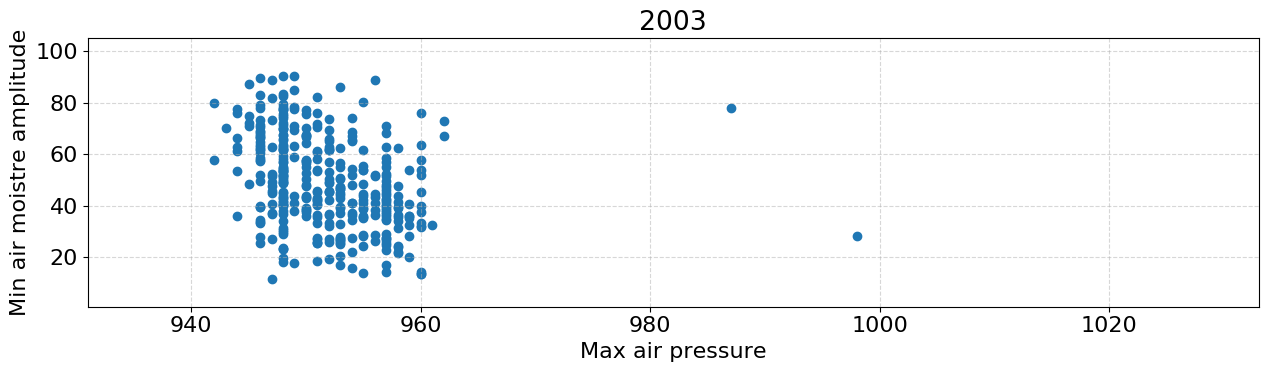

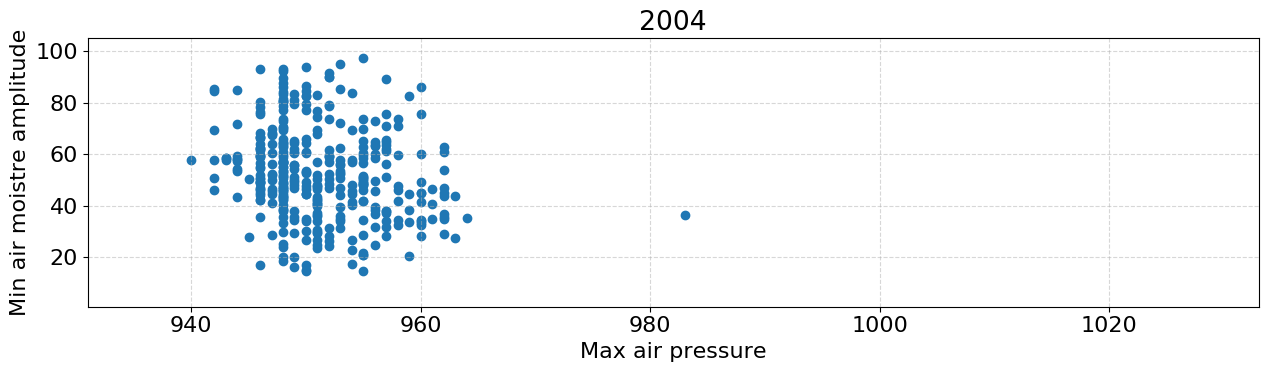

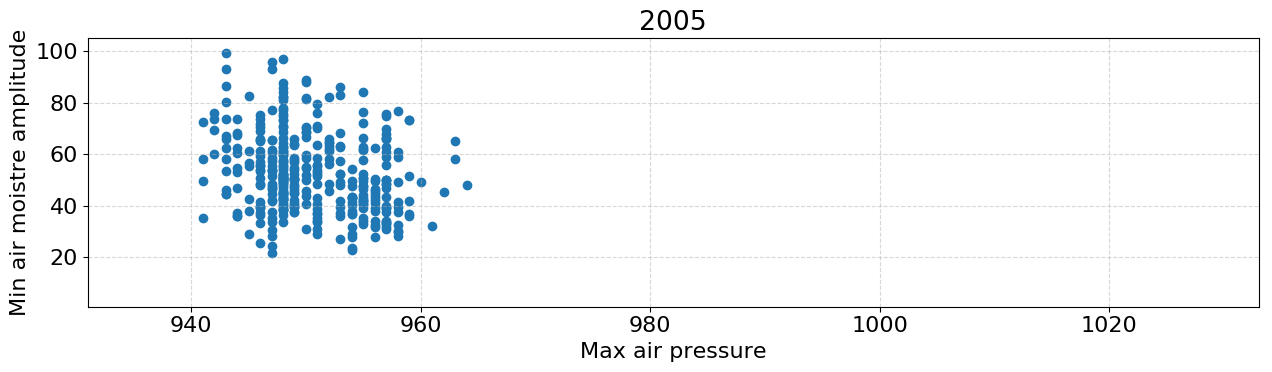

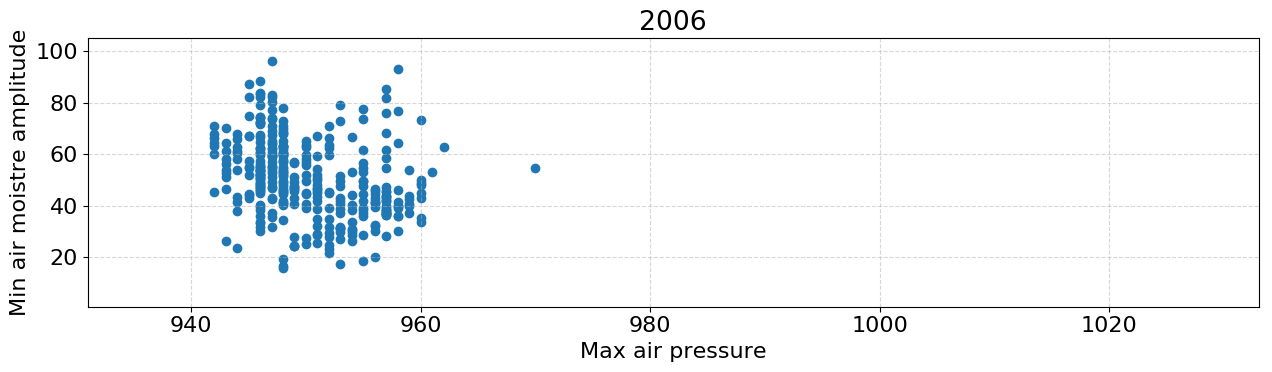

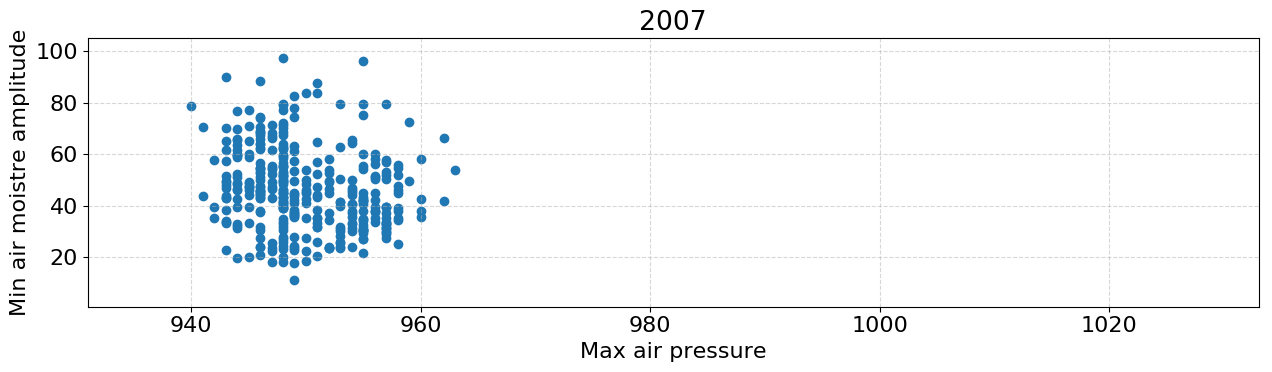

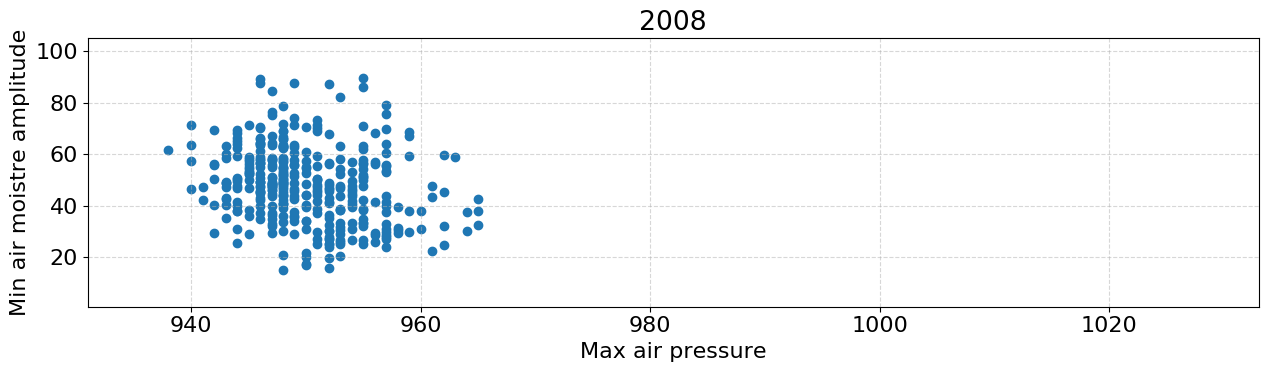

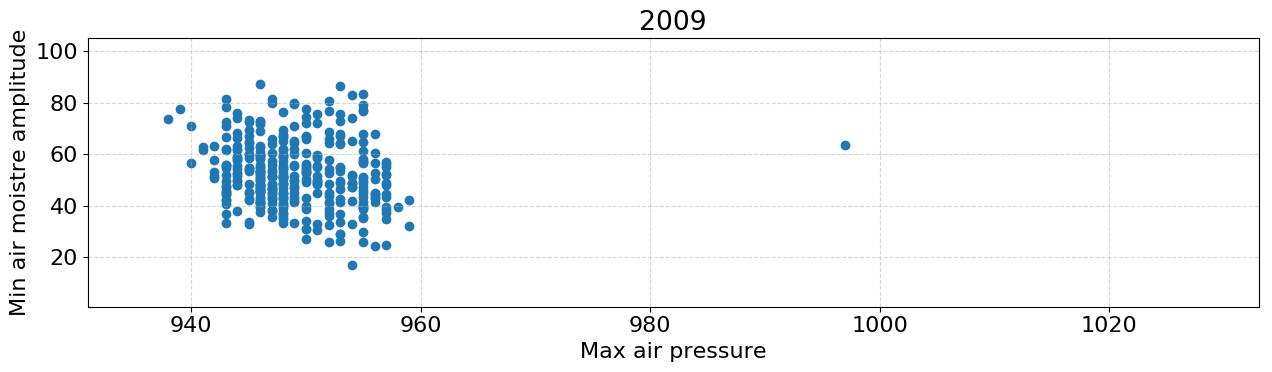

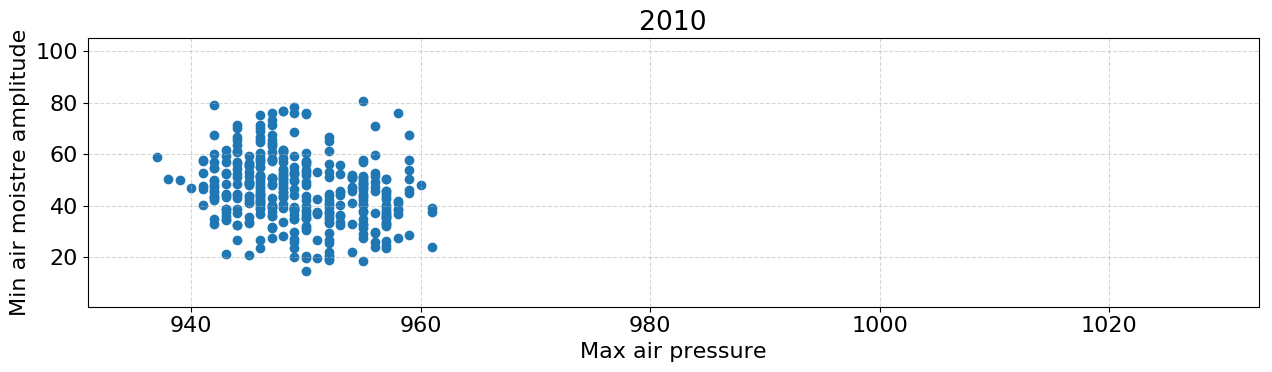

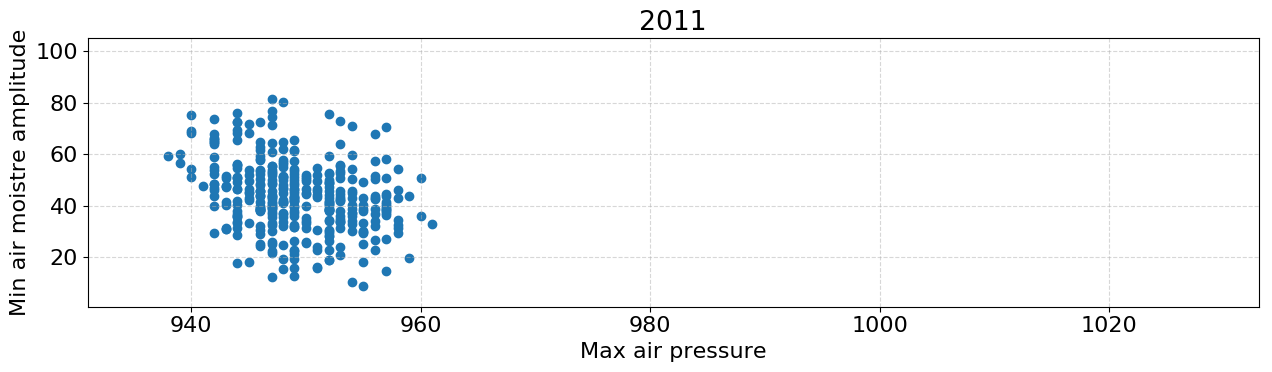

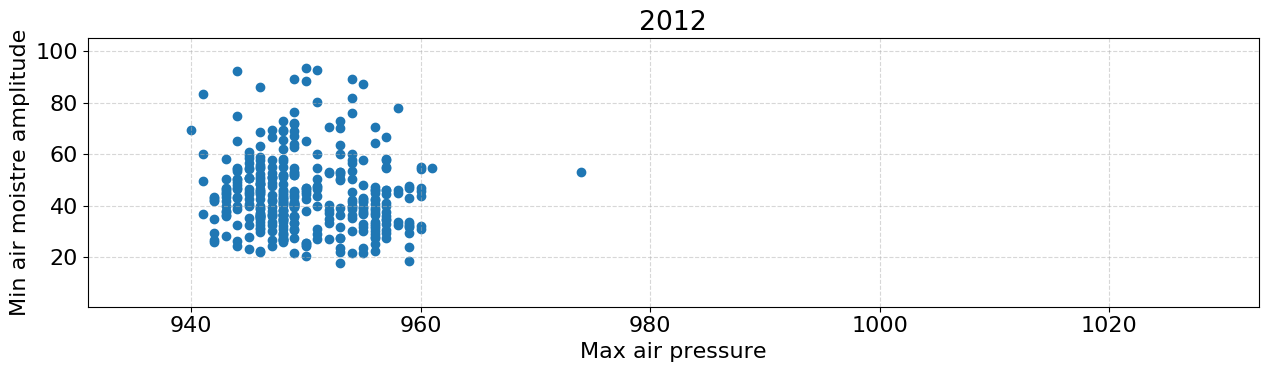

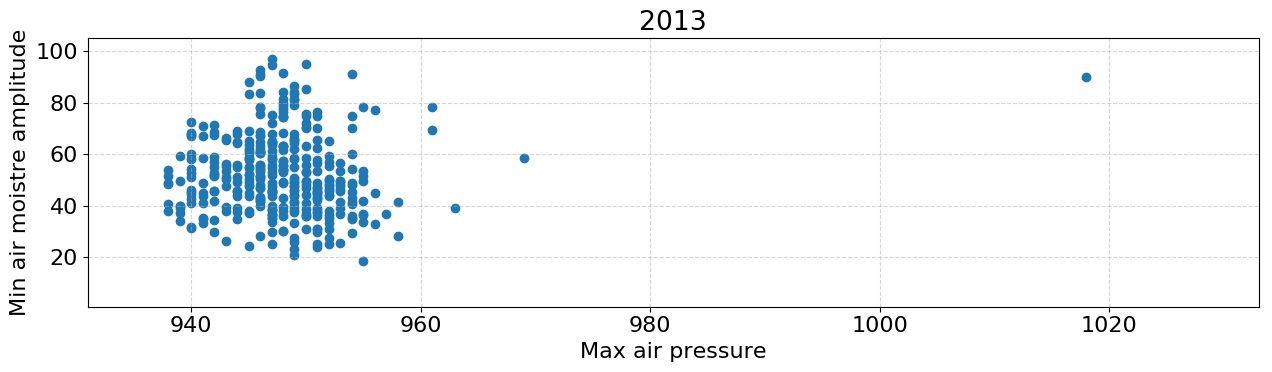

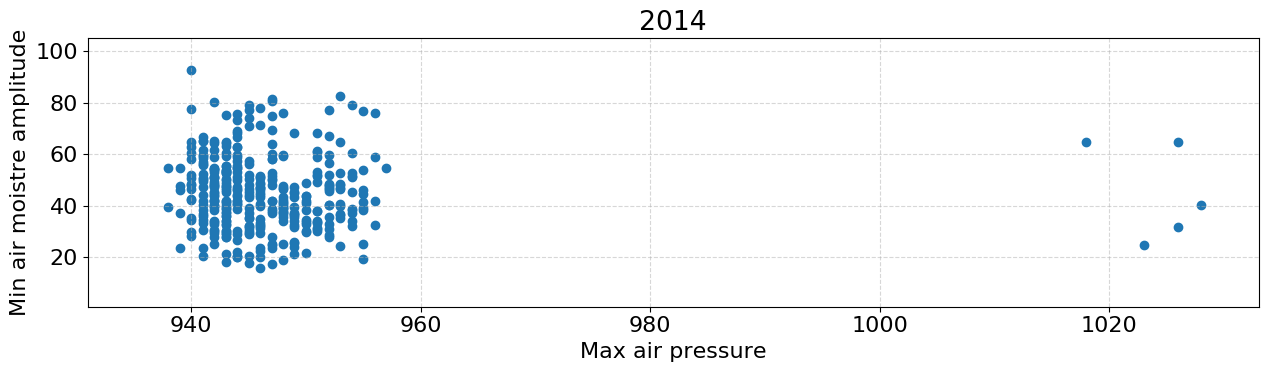

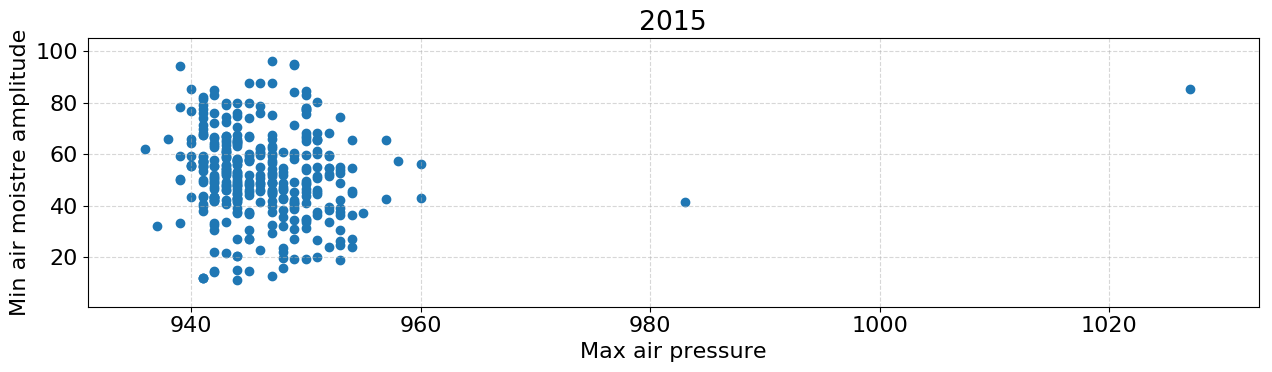

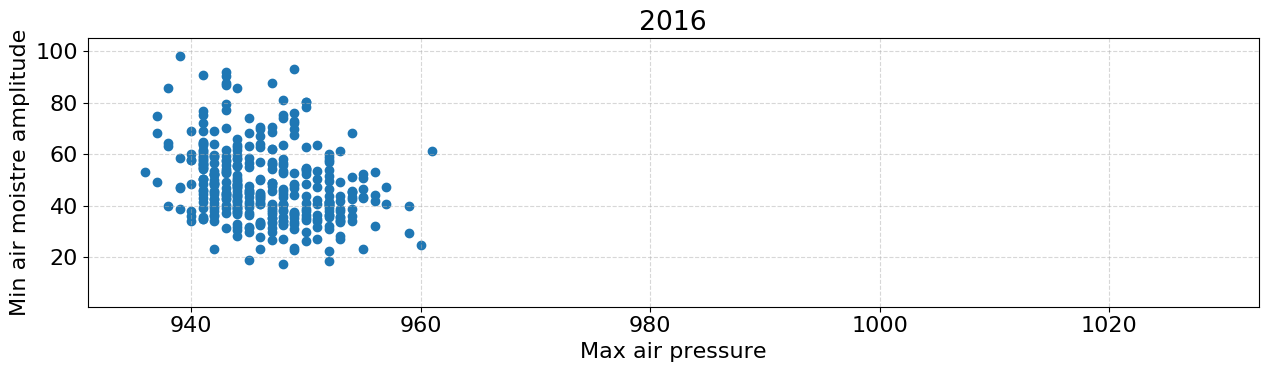

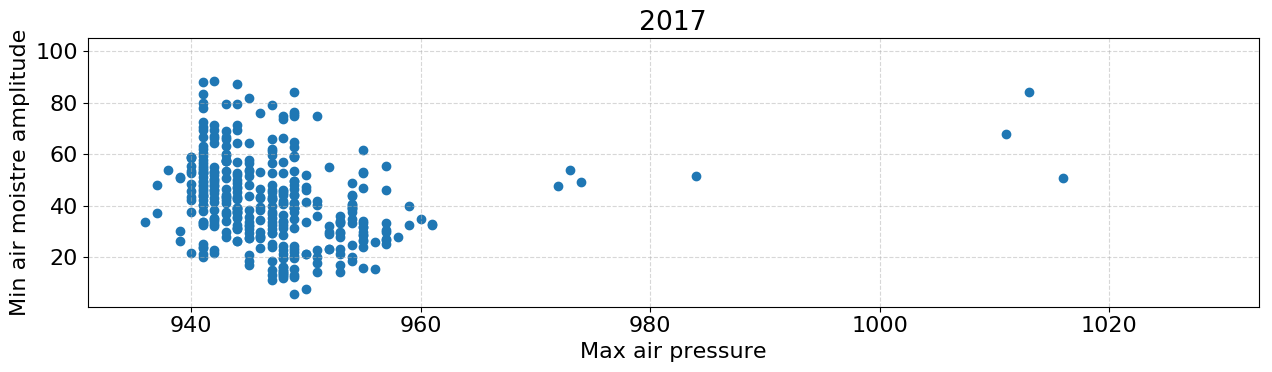

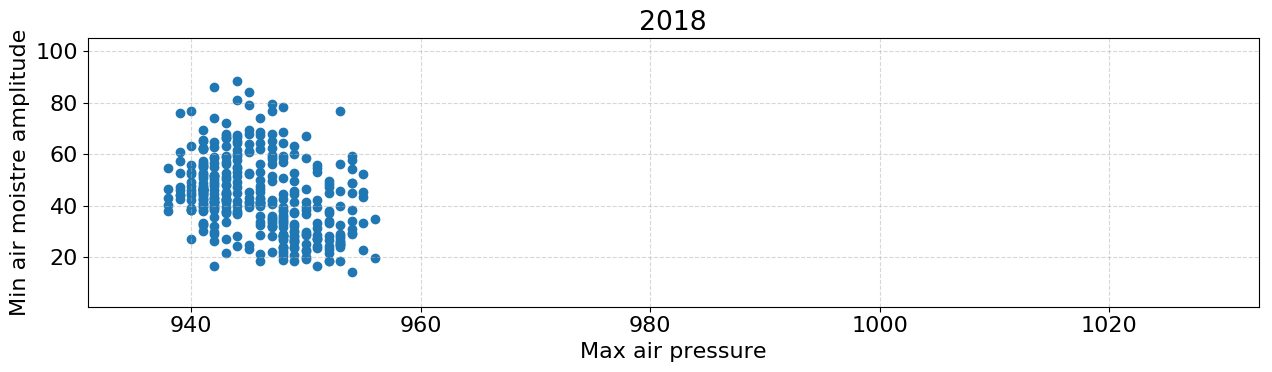

In [21]:
var1 = 'MAX_N_PRESSION_HPA'
var2 = 'MIN_N_AIRMTR_PCT10'

min_x_value = data[var1].min() - 5
max_x_value = data[var1].max() + 5

min_y_value = data[var2].min() - 5
max_y_value = data[var2].max() + 5

for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[var1], data_2plot[var2])
    plt.xlabel('Max air pressure')
    plt.ylabel('Min air moistre amplitude')
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

In [22]:
data[[var1, var2]].corr()

,MAX_N_PRESSION_HPA,MIN_N_AIRMTR_PCT10
MAX_N_PRESSION_HPA,1.000000,-0.062304
MIN_N_AIRMTR_PCT10,-0.062304,1.000000


c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


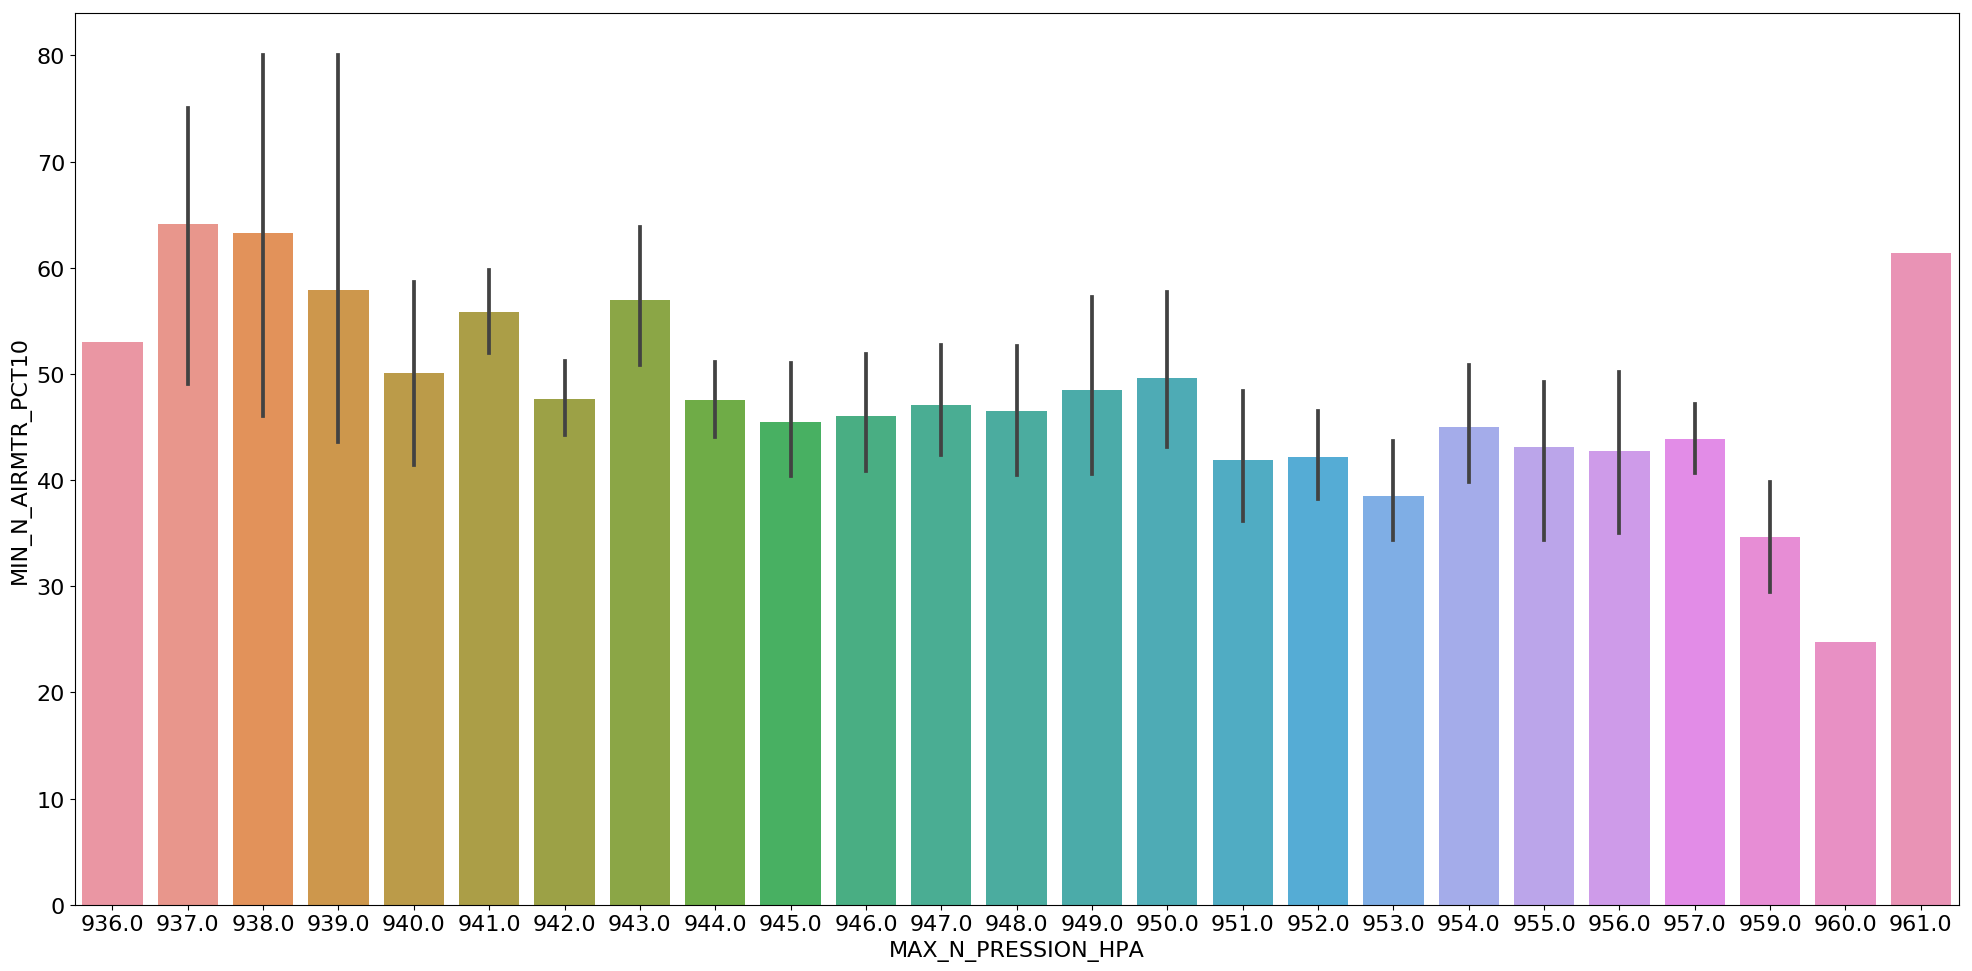

In [23]:
data_plot = data[data.YEAR == 2016]

plt.figure(figsize=(20,10))
sns.barplot(x= var1, y = var2, data = data_plot)

In [24]:
data[var1].nunique()

57

It doens't seems to have a correlation

[Main menu](#0)

<a id=3></a>